<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
#Функция информации о таблицах
def check(df):

    print('Первые пять строк: \n', df.head())
    print('########################')
    print('Информация о талице: \n', df.info())
    print('########################')
    
    display(pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %']).sort_values(by='NaNs, %', ascending=False).style.format(
    '{:.2f}').background_gradient('coolwarm'))
    print('########################')
    print('Количество дупликатов в таблице: \n', df.duplicated().sum())
    print('########################')

In [4]:
check(train)

Первые пять строк: 
                   date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.65

,"NaNs, %"
secondary_cleaner.output.tail_sol,11.34
rougher.state.floatbank10_e_air,3.08
rougher.input.floatbank11_xanthate,3.02
primary_cleaner.output.concentrate_sol,2.02
secondary_cleaner.state.floatbank2_a_air,1.53
final.output.concentrate_sol,1.49
rougher.input.feed_size,1.02
rougher.input.feed_pb,0.71
primary_cleaner.input.xanthate,0.71
final.output.tail_pb,0.71


########################
Количество дупликатов в таблице: 
 0
########################


In [5]:
check(test)

Первые пять строк: 
                   date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                

,"NaNs, %"
rougher.input.floatbank11_xanthate,0.47
rougher.input.feed_sol,0.40
secondary_cleaner.state.floatbank3_a_air,0.17
rougher.input.floatbank11_sulfate,0.15
primary_cleaner.input.depressant,0.09
rougher.input.floatbank10_sulfate,0.09
primary_cleaner.input.xanthate,0.08
primary_cleaner.input.sulfate,0.08
rougher.input.feed_rate,0.06
secondary_cleaner.state.floatbank2_a_air,0.06


########################
Количество дупликатов в таблице: 
 0
########################


В таблице train 87 колонок, 14149 строк, есть пропуски. В таблице test 53 колонки, 5290 строк, ест. пропуски

In [6]:
#Переменные для расчёта эффективности обогащения
F = train['rougher.input.feed_au']
C = train['rougher.output.concentrate_au']
T = train['rougher.output.tail_au']

In [7]:
recovery = C*(F-T)/(F*(C-T))*100
print(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


In [8]:
error = mae(train['rougher.output.recovery'], recovery)
print('MAE:', error)

MAE: 9.73512347450521e-15


Среднее абсолютное отклонение очень маленькое, следовательно формулу и расчеты можно считать верными

In [9]:
unavailable = [i for i in train.columns if i not in test.columns]
unavailable

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### Вывод
- Из 34 пропущенных признаков 30 относятся к параметрам продукта и только 4 к расчетным характеристикам
- 9 пропущенных признаков этапа final, 8 primary_cleaner, 9 rougher, 4 secondary_cleaner относятся к параметрам продукта
- 4 пропущенных признака этапа rougher относятся к расчетным характеристикам
- В test на всех этапах отсутствует информация о хвостовых частях 
- В test у всех этапах, кроме повторной очистки отсутствует информация о доле металлов
- В test у финального этапа и этапа флотации отсутствуют признаки обогащения
- В test так же отсутствуют данные о некоторых реагентах на этапе флотации
- Резюме: в test отсутствуют данные, которые к моменту начала процесса, когда мы хотим получить прогноз, мы не имеем. Если у нас уже будут эти данные, то там прогнозировать уже ничего не нужно, можно просто посчитать по формуле.

Так как в условии сказано, что соседние по времени параметры часто похожи, то заполним пропуски соседними значениями. Столбец date не влияет на модель обучения, поэтому его можно удалить(см. пункт 3.1)

In [10]:
train = train.sort_values(by = 'date').ffill()
test = test.sort_values(by = 'date').ffill()

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [11]:
print('Концентрация металлов до флотации \n')
print('Концентрация золота:', round(train['rougher.input.feed_au'].mean(), 2), '%',
     'Концентрация серебра:', round(train['rougher.input.feed_ag'].mean(), 2), '%',
      'Концентрация sol:', round(train['rougher.input.feed_sol'].mean(), 2), '%',
     'Концентрация свинца:', round(train['rougher.input.feed_pb'].mean(), 2), '% \n')
print('Концентрация металлов после флотации \n')
print('Концентрация золота:', round(train['rougher.output.concentrate_au'].mean(), 2), '%',
     'Концентрация серебра:', round(train['rougher.output.concentrate_ag'].mean(), 2), '%',
      'Концентрация sol:', round(train['rougher.output.concentrate_sol'].mean(), 2), '%',
     'Концентрация свинца:', round(train['rougher.output.concentrate_pb'].mean(), 2), '% \n')
print('Концентрация металлов после первой очистки \n')
print('Концентрация золота:', round(train['primary_cleaner.output.concentrate_au'].mean(), 2), '%',
     'Концентрация серебра:', round(train['primary_cleaner.output.concentrate_ag'].mean(), 2), '%',
      'Концентрация sol:', round(train['primary_cleaner.output.concentrate_sol'].mean(), 2), '%',
     'Концентрация свинца:', round(train['primary_cleaner.output.concentrate_pb'].mean(), 2), '% \n')
print('Концентрация металлов после второй очистки \n')
print('Концентрация золота:', round(train['final.output.concentrate_au'].mean(), 2), '%',
     'Концентрация серебра:', round(train['final.output.concentrate_ag'].mean(), 2), '%',
     'Концентрация sol:', round(train['final.output.concentrate_sol'].mean(), 2), '%',
     'Концентрация свинца:', round(train['final.output.concentrate_pb'].mean(), 2), '%')

Концентрация металлов до флотации 

Концентрация золота: 7.87 % Концентрация серебра: 8.58 % Концентрация sol: 36.29 % Концентрация свинца: 3.51 % 

Концентрация металлов после флотации 

Концентрация золота: 19.44 % Концентрация серебра: 11.78 % Концентрация sol: 28.29 % Концентрация свинца: 7.66 % 

Концентрация металлов после первой очистки 

Концентрация золота: 32.39 % Концентрация серебра: 8.2 % Концентрация sol: 10.02 % Концентрация свинца: 9.57 % 

Концентрация металлов после второй очистки 

Концентрация золота: 44.0 % Концентрация серебра: 5.14 % Концентрация sol: 9.11 % Концентрация свинца: 10.13 %


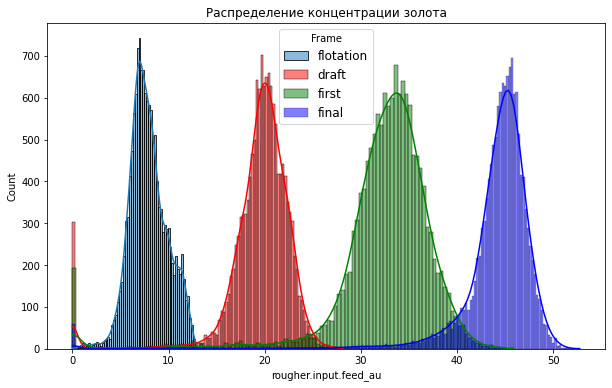

In [12]:
#Распределение концентрации золота на различных этапах
plt.figure(figsize=(10,6))
sns.histplot(train['rougher.input.feed_au'], kde = True, label = 'flotation')
sns.histplot(train['rougher.output.concentrate_au'], kde = True,label = 'draft', color ='r')
sns.histplot(train['primary_cleaner.output.concentrate_au'], kde = True,label = 'first', color = 'g')
sns.histplot(train['final.output.concentrate_au'], kde = True,label = 'final', color ='b')
plt.title('Распределение концентрации золота')
plt.legend(prop={'size': 12}, title = 'Frame')
plt.show()

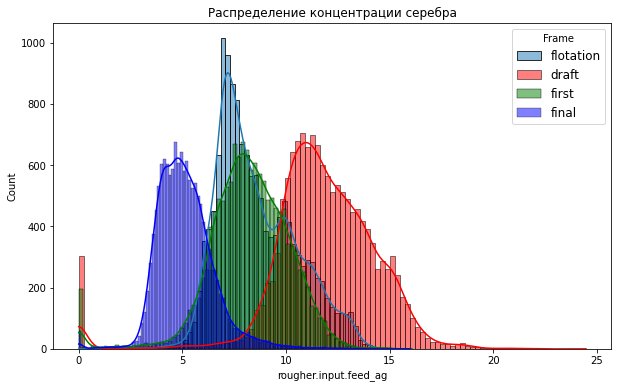

In [13]:
#Распределение концентрации серебра на различных этапах
plt.figure(figsize=(10,6))
sns.histplot(train['rougher.input.feed_ag'], kde = True, label = 'flotation')
sns.histplot(train['rougher.output.concentrate_ag'], kde = True,label = 'draft', color ='r')
sns.histplot(train['primary_cleaner.output.concentrate_ag'], kde = True,label = 'first', color = 'g')
sns.histplot(train['final.output.concentrate_ag'], kde = True,label = 'final', color ='b')
plt.title('Распределение концентрации серебра')
plt.legend(prop={'size': 12}, title = 'Frame')
plt.show()

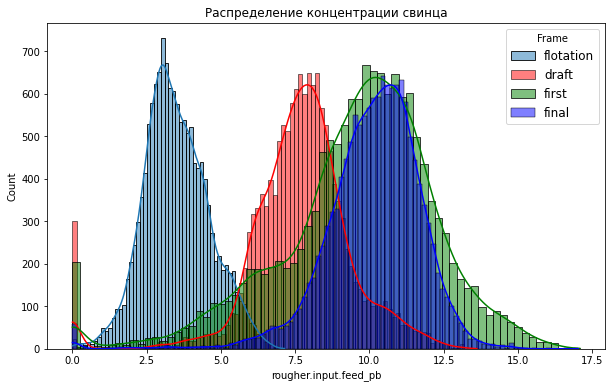

In [14]:
#Распределение концентрации свинца на различных этапах
plt.figure(figsize=(10,6))
sns.histplot(train['rougher.input.feed_pb'], kde = True, label = 'flotation')
sns.histplot(train['rougher.output.concentrate_pb'], kde = True,label = 'draft', color ='r')
sns.histplot(train['primary_cleaner.output.concentrate_pb'], kde = True,label = 'first', color = 'g')
sns.histplot(train['final.output.concentrate_pb'], kde = True,label = 'final', color ='b')
plt.title('Распределение концентрации свинца')
plt.legend(prop={'size': 12}, title = 'Frame')
plt.show()

#### Вывод

Концентрация золота увеличивается после всех этапов обработки. Концентрация серебра сначала увеличивается после флотации, затем уменьшается послей первой очистки. Концентрация свинца увеличивается после всех этапов обработки. Концентрация sol уменьшается. У концентрации каждого вещества есть выбросы в 0.

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках

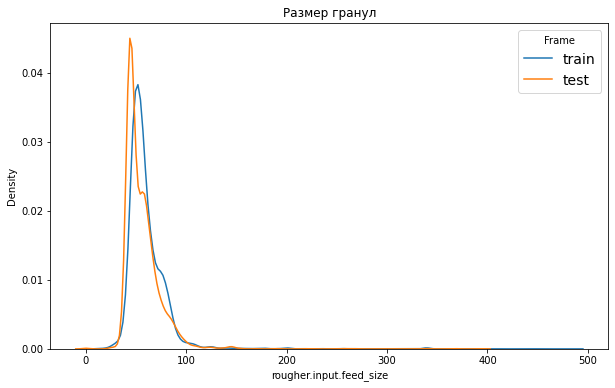

In [15]:
#Распределения размеров гранул сырья на обучающей и тестовой выборках до флотации
plt.figure(figsize=(10,6))
sns.distplot(train['rougher.input.feed_size'], hist = False, kde = True, label = 'train')
sns.distplot(test['rougher.input.feed_size'], hist = False, kde = True,label = 'test')
plt.title('Размер гранул')
plt.legend(prop={'size': 14}, title = 'Frame')
plt.show()

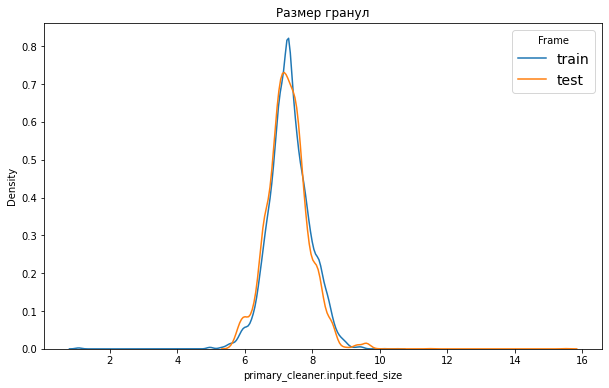

In [16]:
#Распределения размеров гранул сырья на обучающей и тестовой выборках перед первой очисткой
plt.figure(figsize=(10,6))
sns.distplot(train['primary_cleaner.input.feed_size'], hist = False, kde = True, label = 'train')
sns.distplot(test['primary_cleaner.input.feed_size'], hist = False, kde = True,label = 'test')
plt.title('Размер гранул')
plt.legend(prop={'size': 14}, title = 'Frame')
plt.show()

Графики почти идентичны, такую модель можно обучать

### Исследуйте суммарную концентрацию всех веществ на разных стадиях

In [17]:
#Суммарная концентрация
print('Суммарная концентрация металлов в сырье \n')
print('Суммарная концентрация золота:', round(train['rougher.input.feed_au'].sum(), 2),
     'Суммарная концентрация серебра:', round(train['rougher.input.feed_ag'].sum(), 2),
     '\n Суммарная концентрация свинца:', round(train['rougher.input.feed_pb'].sum(), 2), 
      'Суммарная концентрация всех веществ:',  round(train['rougher.input.feed_au'].sum() + 
                                                    train['rougher.input.feed_ag'].sum() + 
                                                     train['rougher.input.feed_pb'].sum(), 2))
print('\n Концентрация металлов в черновом концентрате \n', )
print('Суммарная концентрация золота:', round(train['rougher.output.concentrate_au'].sum(), 2),
     'Суммарная концентрация серебра:', round(train['rougher.output.concentrate_ag'].sum(), 2),
     '\n Суммарная концентрация свинца:', round(train['rougher.output.concentrate_pb'].sum(), 2), 
      'Суммарная концентрация всех веществ:',  round(train['rougher.output.concentrate_au'].sum() + 
                                                    train['rougher.output.concentrate_ag'].sum() + 
                                                     train['rougher.output.concentrate_pb'].sum(), 2))
print('\n Концентрация металлов в финальном концентрате \n')
print('Суммарная концентрация золота:', round(train['final.output.concentrate_au'].sum(), 2), 
     'Суммарная концентрация серебра:', round(train['final.output.concentrate_ag'].sum(), 2), 
     '\n Суммарная концентрация свинца:', round(train['final.output.concentrate_pb'].sum(), 2), 
     'Суммарная концентрация всех веществ:',  round(train['final.output.concentrate_au'].sum() + 
                                                    train['final.output.concentrate_ag'].sum() + 
                                                     train['final.output.concentrate_pb'].sum(), 2))

Суммарная концентрация металлов в сырье 

Суммарная концентрация золота: 111304.2 Суммарная концентрация серебра: 121387.03 
 Суммарная концентрация свинца: 49598.82 Суммарная концентрация всех веществ: 282290.05

 Концентрация металлов в черновом концентрате 

Суммарная концентрация золота: 275055.96 Суммарная концентрация серебра: 166615.97 
 Суммарная концентрация свинца: 108445.79 Суммарная концентрация всех веществ: 550117.72

 Концентрация металлов в финальном концентрате 

Суммарная концентрация золота: 622609.65 Суммарная концентрация серебра: 72753.04 
 Суммарная концентрация свинца: 143369.66 Суммарная концентрация всех веществ: 838732.35


In [18]:
def summa(df):
    crude = []
    draft = []
    final = []
    sum_val = pd.DataFrame()
    for i in range(0, df.shape[0]):
 
        crude.append(df['rougher.input.feed_au'][i] + df['rougher.input.feed_ag'][i] + \
        df['rougher.input.feed_pb'][i] + df['rougher.input.feed_sol'][i])
        draft.append(df['rougher.output.concentrate_au'][i] + df['rougher.output.concentrate_ag'][i] + \
        df['rougher.output.concentrate_pb'][i] + df['rougher.output.concentrate_sol'][i])
        final.append(df['final.output.concentrate_au'][i] + df['final.output.concentrate_ag'][i] + \
        df['final.output.concentrate_pb'][i] + df['final.output.concentrate_sol'][i])
    sum_val['crude'] = pd.Series(crude)
    sum_val['draft'] = pd.Series(draft)
    sum_val['final'] = pd.Series(final)
    display(summa)
    plt.figure(figsize=(20, 44))
    plt.subplot(6, 1, 1) 
    plt.title('Ящик с усами сырья')
    plt.boxplot(sum_val['crude'])
    plt.subplot(6, 1, 2)
    plt.title('Ящик с усами в черновом концентрате')
    plt.boxplot(sum_val['draft'])
    plt.subplot(6, 1, 3)
    plt.title('Ящик с усами в финальном концентрате')
    plt.boxplot(sum_val['final'])
    plt.subplot(6, 1, 4)
    plt.title('Гистограмма распределения суммы концентратов в сырье')
    plt.hist(sum_val['crude'], bins = 40)
    plt.subplot(6, 1, 5)
    plt.title('Гистограмма распределения суммы концентратов в черновом концентрате')
    plt.hist(sum_val['draft'], bins = 40)
    plt.subplot(6, 1, 6)
    plt.title('Гистограмма распределения суммы концентратов в финальном концентрате')
    plt.hist(sum_val['final'], bins = 40)
    
    plt.show()
    return sum_val

<function __main__.summa(df)>

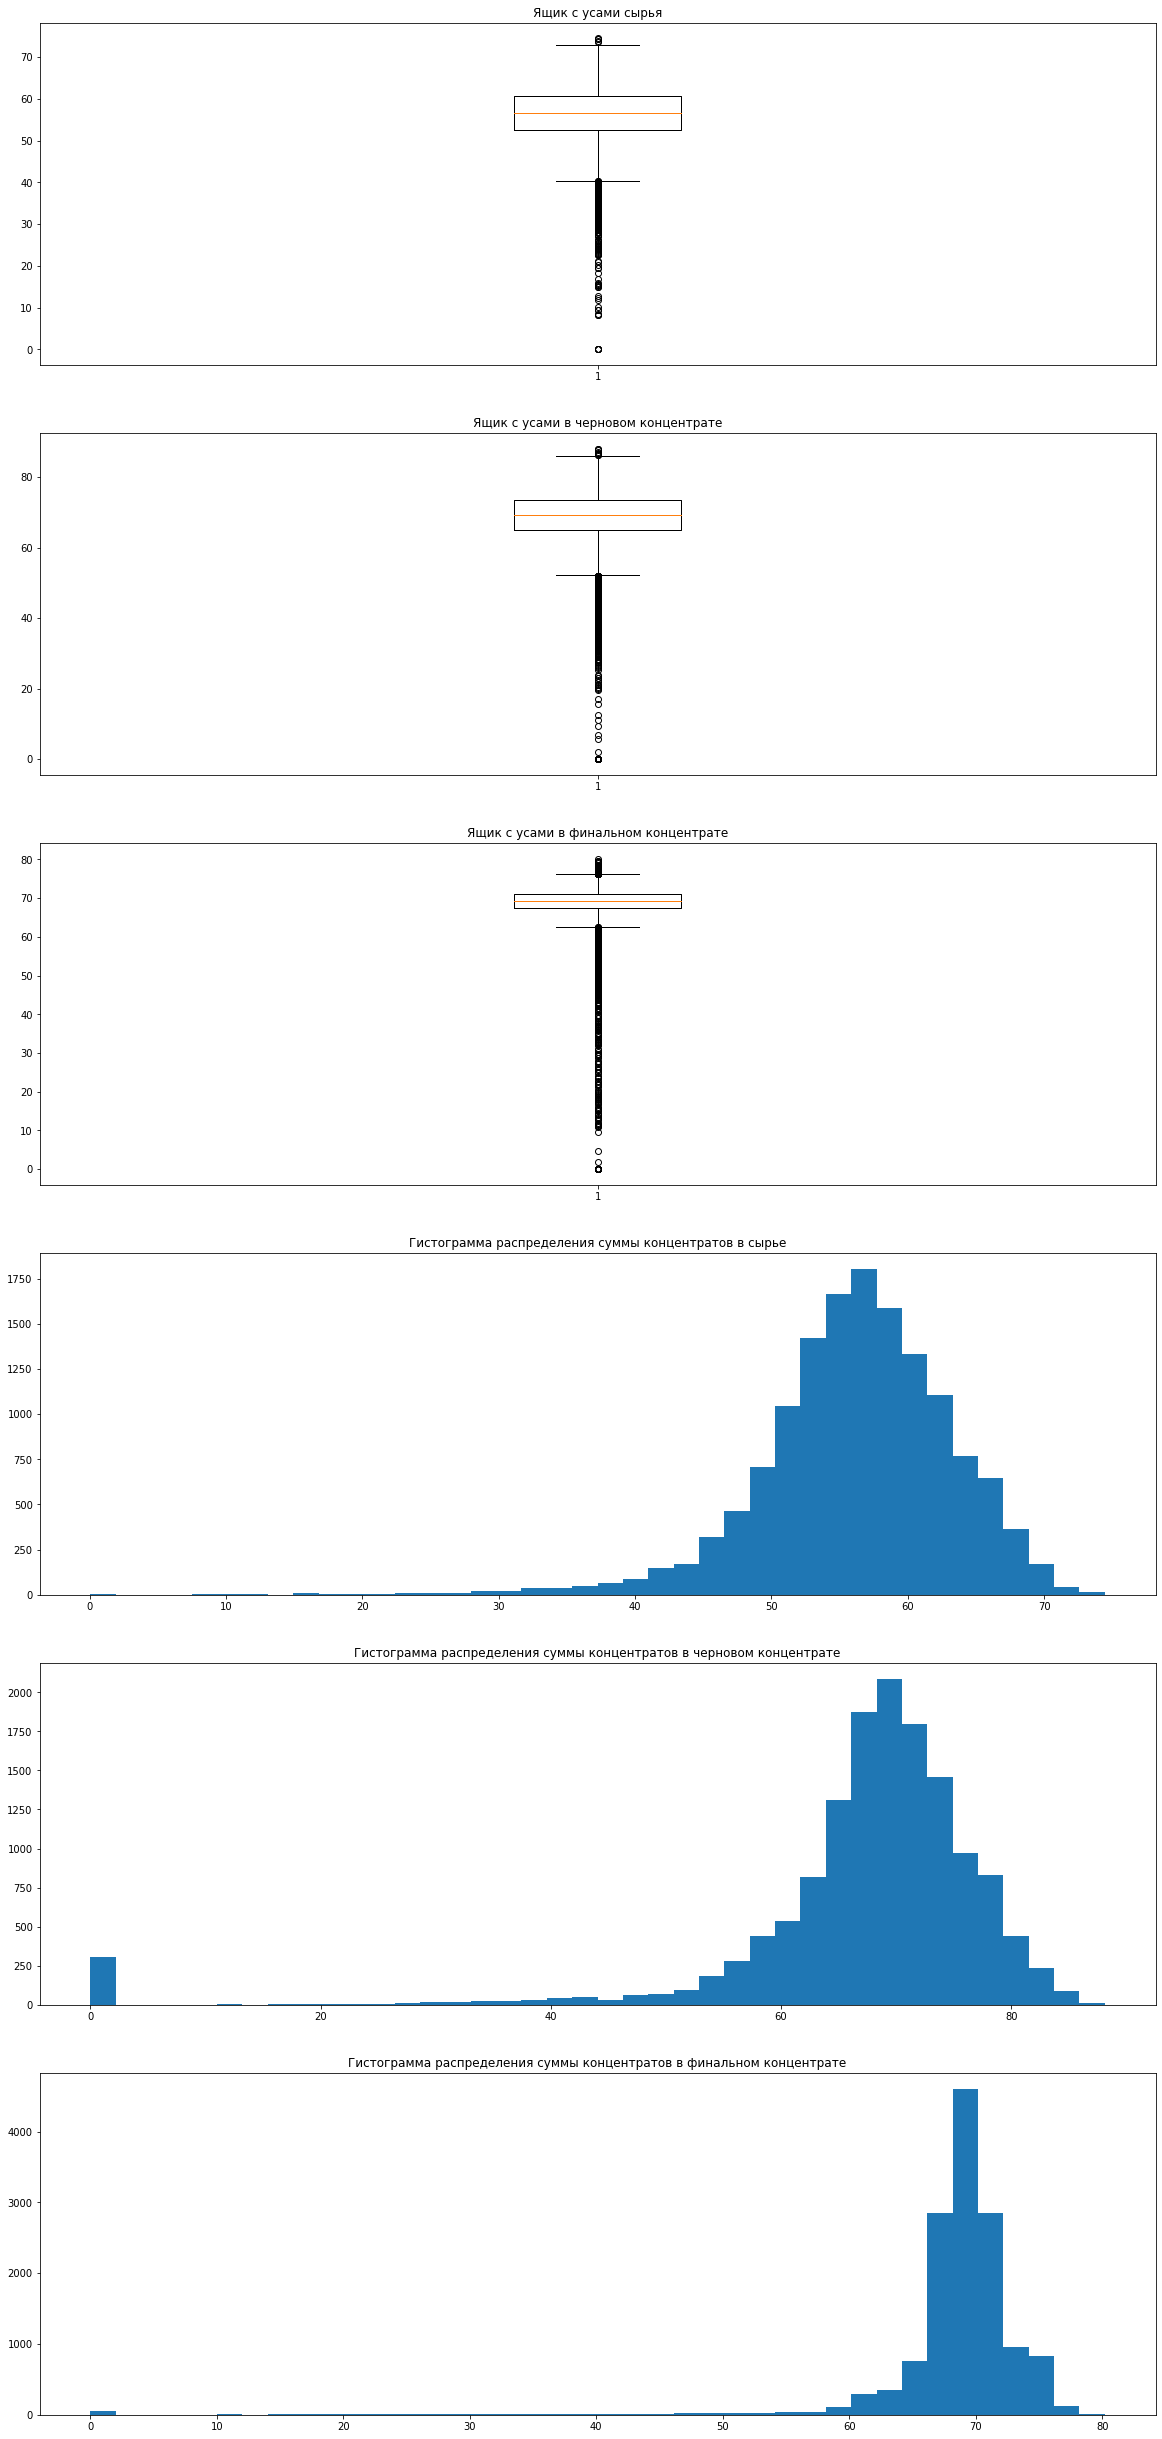

,crude,draft,final
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667
...,...,...,...
14144,53.415050,70.781325,68.098589
14145,53.696482,70.539603,68.274362
14146,54.589604,55.376330,68.226068
14147,54.027355,69.201689,68.200449


In [19]:
summa(train)

Можно заметить, что во всех распределениях присутствует пик около нулевого значения. Он очень далек от общего распределения, его следует удалить

In [20]:
def clr(data):
    data_clr = data.drop(data[data['rougher.input.feed_au'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.input.feed_ag'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.input.feed_pb'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.input.feed_sol'] < 1].index, axis = 0)

    data_clr = data_clr.drop(data_clr[data_clr['rougher.output.concentrate_au'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.output.concentrate_ag'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.output.concentrate_pb'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['rougher.output.concentrate_sol'] < 1].index, axis = 0)
    
    data_clr = data_clr.drop(data_clr[data_clr['primary_cleaner.output.concentrate_au'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['primary_cleaner.output.concentrate_ag'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['primary_cleaner.output.concentrate_pb'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['primary_cleaner.output.concentrate_sol'] < 1].index, axis = 0)

    data_clr = data_clr.drop(data_clr[data_clr['final.output.concentrate_au'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['final.output.concentrate_ag'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['final.output.concentrate_pb'] < 1].index, axis = 0)
    data_clr = data_clr.drop(data_clr[data_clr['final.output.concentrate_sol'] < 1].index, axis = 0).reset_index()
    data_clr = data_clr.drop('index', axis = 1)
    return data_clr

In [21]:
train_clr = clr(train)

<function __main__.summa(df)>

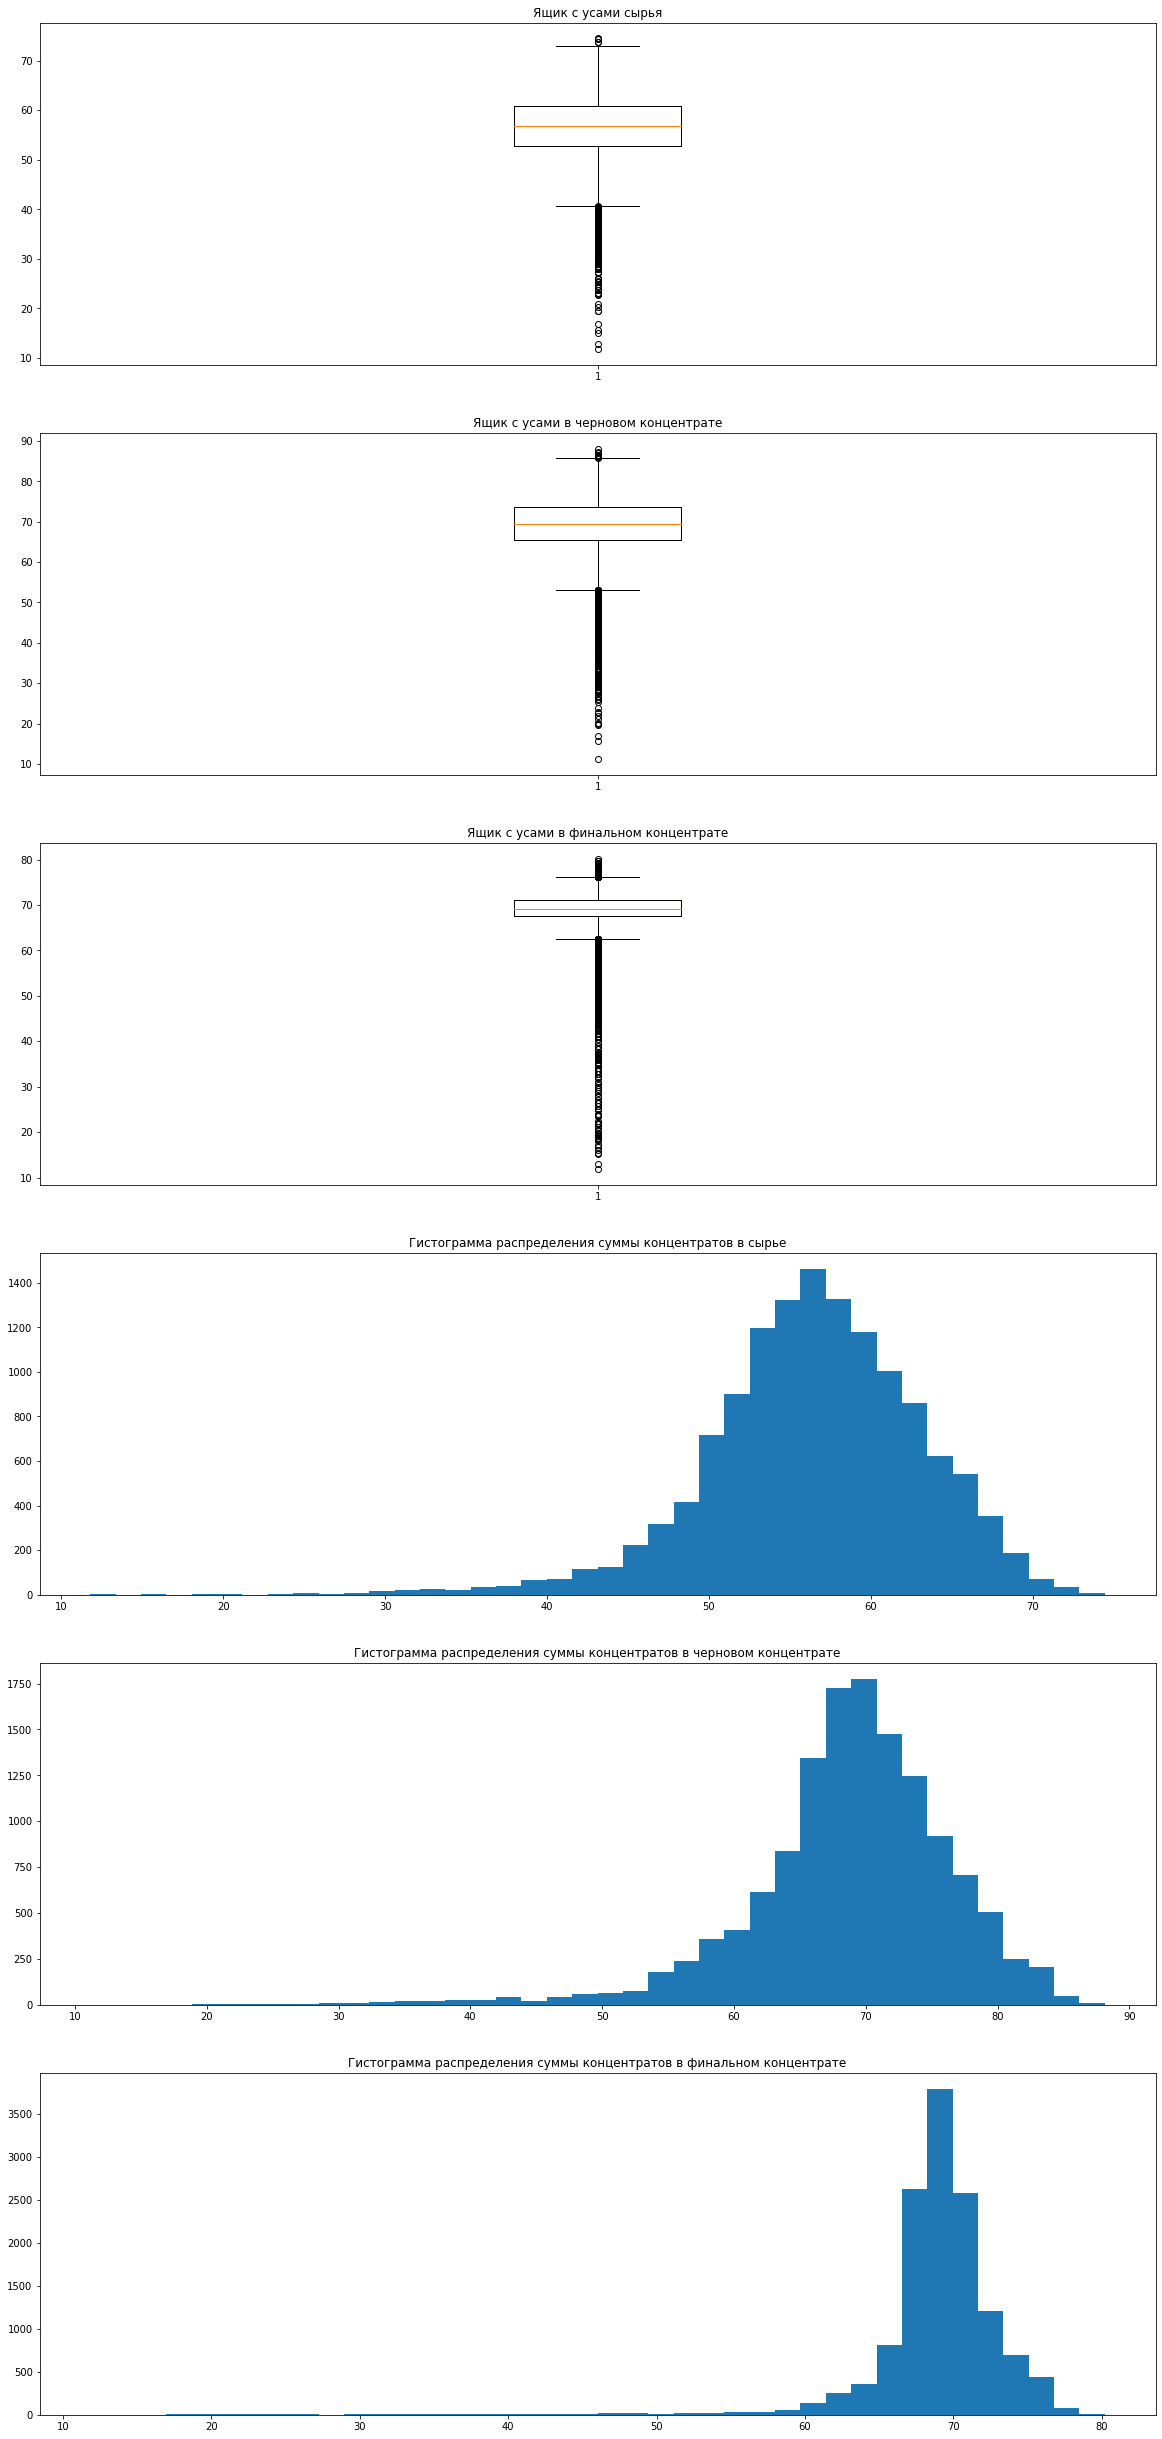

,crude,draft,final
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667
...,...,...,...
13299,53.415050,70.781325,68.098589
13300,53.696482,70.539603,68.274362
13301,54.589604,55.376330,68.226068
13302,54.027355,69.201689,68.200449


In [22]:
summa(train_clr)

### Вывод

- Концентрация золота увеличивается после всех этапов обработки. Концентрация серебра сначала увеличивается после флотации, затем уменьшается послей первой очистки. Концентрация свинца увеличивается после всех этапов обработки. Концентрация sol уменьшается
- Распределения размеров гранул сырья на обучающей и тестовой выборках почти одинаковы, значит предобработка выполнена корректно
- Суммарная концентрация увеличивается на каждом этапе обработки
- В результате исследования данных были найдены аномалии и удалены

## Модель

### Подготовка

In [23]:
def calculate_smape(target_actual, target_predictions):
 
    error = 1 / len(target_actual) * np.sum(np.abs(target_actual - target_predictions) / ((np.abs(target_actual) + np.abs(target_predictions)) / 2)) * 100 
    return error

In [24]:
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

In [25]:
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

Удалим лишние признаки из train, которых нет в test и добавим в test целевые признаки из data по 'date'

In [26]:
#Добавление в test целевых признаков
test = test.merge(data[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')

In [27]:
test_features = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
test_target = test[['rougher.output.recovery', 'final.output.recovery']]

In [28]:
test_target.shape, test_features.shape

((5290, 2), (5290, 52))

In [29]:
train_clr = train_clr.drop('date', axis =1)
train_features = train_clr.drop(unavailable, axis = 1)
train_target = train_clr[['rougher.output.recovery', 'final.output.recovery']]

In [30]:
train_features.shape, train_target.shape

((13304, 52), (13304, 2))

### LinearRegression

In [31]:
%%time

model = LinearRegression()
model.fit(train_features, train_target)
predictions_lr = model.predict(test_features)
print('Mean R2 from CV of LinearRegression =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of LinearRegression =', cross_val_score(model, train_features, train_target, cv=5, scoring = smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
lr_pred = pd.DataFrame(predictions_lr, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), lr_pred], axis = 1))

Mean R2 from CV of LinearRegression = -0.3183326211688747
Mean sMAPE from CV of LinearRegression = -9.82786784526738
Результат модели: 0.45213067138985436
      rougher.output.recovery  final.output.recovery      rough      final
0                   89.993421              70.273583  88.838087  73.147782
1                   88.089657              68.910432  88.872339  72.735487
2                   88.412756              68.143213  88.997212  73.091408
3                   87.360133              67.776393  88.131907  73.352534
4                   83.236367              61.467078  86.392559  71.400499
...                       ...                    ...        ...        ...
5285                95.172585              68.919891  95.272704  74.138417
5286                94.575036              68.440582  93.365606  73.194436
5287                93.018138              67.092759  92.542304  74.581144
5288                92.599042              68.061186  93.532999  75.823357
5289                

### RandomForestRegressor

In [32]:
rfr = RandomForestRegressor(random_state = 12345)

In [33]:
param_grid =  {'n_estimators' : [10,20,30],
              'max_depth' : [2,4,6]
              }

In [34]:
cv_rfc = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, scoring = smape_scorer)
cv_rfc.fit(train_features, train_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             scoring=make_scorer(calculate_final_smape, greater_is_better=False))

In [35]:
cv_rfc.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=30, random_state=12345)

In [36]:
%%time

model = RandomForestRegressor(n_estimators = 30, max_depth = 4)
model.fit(train_features, train_target)
predictions_rf = model.predict(test_features)
print('Mean R2 from CV of RandomForestRegressor =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of RandomForestRegressor =', cross_val_score(model, train_features, train_target, cv=5, scoring = smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
rf_pred = pd.DataFrame(predictions_rf, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), rf_pred], axis = 1))

Mean R2 from CV of RandomForestRegressor = -0.052580960992703096
Mean sMAPE from CV of RandomForestRegressor = -8.506754122574826
Результат модели: 0.4450658664284182
      rougher.output.recovery  final.output.recovery      rough      final
0                   89.993421              70.273583  85.788061  70.336130
1                   88.089657              68.910432  85.650957  70.188870
2                   88.412756              68.143213  85.650957  70.188870
3                   87.360133              67.776393  85.650957  70.188870
4                   83.236367              61.467078  85.650957  70.188870
...                       ...                    ...        ...        ...
5285                95.172585              68.919891  81.744790  65.359622
5286                94.575036              68.440582  87.529808  70.453903
5287                93.018138              67.092759  92.181669  74.082132
5288                92.599042              68.061186  92.181669  74.082132
5289    

### DecisionTreeRegressor

In [37]:
dtr = DecisionTreeRegressor(random_state = 12345)

In [38]:
parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6],
           "min_samples_leaf":[1,2,3,4,5],
           "max_leaf_nodes":[None,10,20,30] }

In [39]:
tuning_model=GridSearchCV(dtr,param_grid=parameters, scoring= smape_scorer,cv=5)

In [40]:
tuning_model.fit(train_features, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [2, 4, 6],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(calculate_final_smape, greater_is_better=False))

In [41]:
tuning_model.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [42]:
%%time

model = DecisionTreeRegressor (max_depth = 4, max_leaf_nodes = 20, min_samples_leaf = 1, splitter = 'best')
model.fit(train_features, train_target)
predictions_dt = model.predict(test_features)
print('Mean R2 from CV of DecisionTreeRegressor =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of DecisionTreeRegressor =', cross_val_score(model, train_features, train_target, cv=5, scoring=smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
dt_pred = pd.DataFrame(predictions_dt, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), dt_pred], axis = 1))

Mean R2 from CV of DecisionTreeRegressor = -0.16613788349417763
Mean sMAPE from CV of DecisionTreeRegressor = -9.064986256662305
Результат модели: 0.411022026514794
      rougher.output.recovery  final.output.recovery      rough      final
0                   89.993421              70.273583  85.689879  70.643656
1                   88.089657              68.910432  85.689879  70.643656
2                   88.412756              68.143213  85.689879  70.643656
3                   87.360133              67.776393  85.689879  70.643656
4                   83.236367              61.467078  85.689879  70.643656
...                       ...                    ...        ...        ...
5285                95.172585              68.919891  81.551699  66.029621
5286                94.575036              68.440582  92.398710  73.987287
5287                93.018138              67.092759  92.398710  73.987287
5288                92.599042              68.061186  92.398710  73.987287
5289      

In [43]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features, train_target)
dummy_pred = dummy_regr.predict(test_features)
print('dummy sMAPE:', calculate_final_smape(test_target, dummy_pred))

dummy sMAPE: 9.74499284619471


### Вывод

- Итоговое sMAPE для LinearRegression 9.82786784526738
- Итоговое sMAPE для RandomForestRegressor 8.506754122574826
- Итоговое sMAPE для DecisionTreeRegressor 9.064986256662305
- Итоговое sMAPE для DummyRegressor 9.74499284619471
- Лучше всех показал себя RandomForestRegressor с sMape 8.506754122574826

## Вывод

- В test отсутствуют данные, которые к моменту начала процесса, когда мы хотим получить прогноз, мы не имеем. Если у нас уже будут эти данные, то там прогнозировать уже ничего не нужно, можно просто посчитать по формуле.
- Были исследованы распределения концентрации металлов во время различных этапов
- Концентрация золота увеличивается после всех этапов обработки
- Были выявлены и удалены аномалии в данных
- Выделение и добавление целевых признаков
- Распределения размеров гранул сырья на обучающей и тестовой выборках почти одинаковы
- Суммарная концентрация увеличивается на каждом этапе обработки
- Был рассчитан smape
- Проведено исследование разных моделей машинного обучения с различными гиперпараметрами
- Была выявлена лучшая модель, которая показала результаты лучше, чем константная модель
- Для данной задачи лучше всего подходит RandomForestRegressor